<center><h1>Sonawane_Devashish_HW3</h1></center>
<br>
<br>

Name: Devashish Sonawane
<br>
Github Username: Devashish-Sonawane
<br>
USC ID: 3445574607

## 1. Time Series Classification Part 1: Feature Creation/Extraction

### (a) Download Data

Package imports

In [65]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns

Get the AReM Data Set

In this approach, I have created seperate dictionaries to store file paths and the range for file numbers which need to be split. I use a function which uses these values and splits the data into test and training.

In [66]:
# Paths to folder of each category
base_paths = {
    'bending1': '../data/AReM/bending1/',
    'bending2': '../data/AReM/bending2/',
    'cycling': '../data/AReM/cycling/',
    'lying': '../data/AReM/lying/',
    'sitting': '../data/AReM/sitting/',
    'standing': '../data/AReM/standing/',
    'walking': '../data/AReM/walking/',
}

# Ranges for datasets to split between Training and Test
test_files = {
    'bending1': range(1, 3),
    'bending2': range(1, 3),
    'lying': range(1, 4),
    'sitting': range(1, 4),
    'standing': range(1, 4),
    'walking': range(1, 4),
    'cycling': range(1, 4),
}

train_files = {
    'bending1': range(3, 8),
    'bending2': range(3, 7),
    'lying': range(4, 16),
    'sitting': range(4, 16),
    'standing': range(4, 16),
    'walking': range(4, 16),
    'cycling': range(4, 16),
}

# Func to split train and test data
def file_paths(activity, file_range):
    return [f"{base_paths[activity]}dataset{num}.csv" for num in file_range]

### (b) Test and Train Data

Since, we have defined the function. We use it to get dictionaries of split file paths.

In [67]:
# Generating test and train datasets using the func
test = {activity: file_paths(activity, test_files[activity]) for activity in test_files}
train = {activity: file_paths(activity, train_files[activity]) for activity in train_files}

print("Test Datasets:", test)
print("Train Datasets:", train)

Test Datasets: {'bending1': ['../data/AReM/bending1/dataset1.csv', '../data/AReM/bending1/dataset2.csv'], 'bending2': ['../data/AReM/bending2/dataset1.csv', '../data/AReM/bending2/dataset2.csv'], 'lying': ['../data/AReM/lying/dataset1.csv', '../data/AReM/lying/dataset2.csv', '../data/AReM/lying/dataset3.csv'], 'sitting': ['../data/AReM/sitting/dataset1.csv', '../data/AReM/sitting/dataset2.csv', '../data/AReM/sitting/dataset3.csv'], 'standing': ['../data/AReM/standing/dataset1.csv', '../data/AReM/standing/dataset2.csv', '../data/AReM/standing/dataset3.csv'], 'walking': ['../data/AReM/walking/dataset1.csv', '../data/AReM/walking/dataset2.csv', '../data/AReM/walking/dataset3.csv'], 'cycling': ['../data/AReM/cycling/dataset1.csv', '../data/AReM/cycling/dataset2.csv', '../data/AReM/cycling/dataset3.csv']}
Train Datasets: {'bending1': ['../data/AReM/bending1/dataset3.csv', '../data/AReM/bending1/dataset4.csv', '../data/AReM/bending1/dataset5.csv', '../data/AReM/bending1/dataset6.csv', '../da

### (c) Feature Extraction

#### i. Research

Time-domain features for time series classification include:

1) <b>Minimum</b>: Smallest value<br>
2) <b>Maximum</b>: Largest value<br>
3) <b>Mean</b>: Average value<br>
4) <b>Median</b>: Middle value<br>
5) <b>Standard Deviation</b>: Spread or variability<br>
6) <b>First Quartile (Q1)</b>: 25% lower value or 25th Percentile value<br>
7) <b>Third Quartile (Q3)</b>: 25% upper value or 25th Percentile value<br>
8) <b>Range</b>: This is the difference between the maximum and minimum value<br>
9) <b>Variance</b>: Spread of values<br>
10) <b>Skewness</b>: This is asymmetry of the data<br>
11) <b>Energy</b>: This is strength of a signal<br>
12) <b>Entropy</b>: This is randomness in the data<br>
13) <b>Autocorrelation</b>: These are patterns which repeat many times in data<br>

#### ii. Extraction

This code was written to Clean the <b>'/bending2/dataset4.csv'</b> file. I removed the trailing comma in last line of <b>'cycling/dataset9.csv'</b> and <b>'cycling/dataset14.csv'</b> manually. This code is commented since the cleaned file is saved with same name as dataset4.csv and being submitted along with this notebook. Uncommenting and running this block might cause issues since the file is already cleaned.

In [68]:
#input_file_path = '../data/AReM/bending2/dataset4.csv'
#output_file_path = '../data/AReM/bending2/dataset_proper.csv'
#data_df = pd.read_csv(input_file_path, sep=r'\s+', skiprows=5, header=None)
#header = ['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
#data_df.columns = header
#data_df.to_csv(output_file_path, index=False)

The <b>col_names</b> function generates headers or column names. The <b>features</b> function reads the csv files, calculates the statistical data and returns output as a dataframe. This function will be used to extract features from test and train dataset.

In [69]:
# This func will generate headers in Dataframe
def col_names(num_features):
    cols = []
    for i in range(num_features):
        cols.extend([
            f'Min_{i + 1}',
            f'Max_{i + 1}',
            f'Mean_{i + 1}',
            f'Median_{i + 1}',
            f'Q1_{i + 1}',
            f'Q3_{i + 1}',
            f'Std_{i + 1}'
        ])
    return cols

# This func will read file and calculate statistical data
def features(data):
    time_features = {}
    num_features = 6
    column_names = col_names(num_features)

    for key, value in data.items():
        for path in value:
            df = pd.read_csv(path, skiprows=5, header=None)
            df.columns = ['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
            row = []
            for i in range(1, len(df.columns)):
                arr = df.iloc[:, i].to_numpy()

                # I am using numpy to calculate
                row.extend([
                    round(np.min(arr), 2),
                    round(np.max(arr), 2),
                    round(np.mean(arr), 2),
                    round(np.median(arr), 2),
                    round(np.quantile(arr, 0.25), 2),
                    round(np.quantile(arr, 0.75), 2),
                    round(np.std(arr), 2)
                ])

            # Creating key from  file path
            a = path.split('/')
            b = f"{a[3]}/{a[4]}"
            time_features[b] = row

    # Saving as Dataframe
    feature_df = pd.DataFrame.from_dict(time_features, orient='index')
    feature_df.columns = column_names
    
    # Resetting index
    feature_df.reset_index(inplace=True)
    feature_df.rename(columns={'index': 'File'}, inplace=True)
    return feature_df

Since, we have defined functions. Now we use them to extract features from Training and Test data.

In [70]:
train_df = features(train)
train_df

,File,Min_1,Max_1,Mean_1,Median_1,Q1_1,Q3_1,Std_1,Min_2,Max_2,...,Q1_5,Q3_5,Std_5,Min_6,Max_6,Mean_6,Median_6,Q1_6,Q3_6,Std_6
0,bending1/dataset3.csv,35.00,47.40,43.95,44.33,43.00,45.00,1.56,0.0,1.70,...,35.36,36.50,2.00,0.0,1.79,0.49,0.43,0.00,0.94,0.51
1,bending1/dataset4.csv,33.00,47.75,42.18,43.50,39.15,45.00,3.67,0.0,3.00,...,30.46,36.33,3.85,0.0,2.18,0.61,0.50,0.00,1.00,0.52
2,bending1/dataset5.csv,33.00,45.75,41.68,41.75,41.33,42.75,2.24,0.0,2.83,...,28.46,31.25,2.41,0.0,1.79,0.38,0.43,0.00,0.50,0.39
3,bending1/dataset6.csv,37.00,48.00,43.45,43.25,42.50,45.00,1.38,0.0,1.58,...,22.25,24.00,2.49,0.0,5.26,0.68,0.50,0.43,0.87,0.62
4,bending1/dataset7.csv,36.25,48.00,43.97,44.50,43.31,44.67,1.62,0.0,1.50,...,20.50,23.75,3.31,0.0,2.96,0.56,0.49,0.00,0.83,0.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,cycling/dataset11.csv,27.00,44.33,36.54,36.00,33.25,39.81,4.01,0.0,10.43,...,15.00,19.50,3.08,0.0,9.18,3.23,2.87,1.88,4.26,1.77
65,cycling/dataset12.csv,18.50,44.25,35.75,36.00,33.00,39.33,4.61,0.0,12.60,...,14.00,18.06,3.12,0.0,9.39,3.07,2.77,1.80,4.06,1.75
66,cycling/dataset13.csv,19.00,43.75,35.88,36.00,33.00,39.50,4.61,0.0,11.20,...,14.75,19.69,3.53,0.0,8.50,3.09,2.93,1.89,4.06,1.62
67,cycling/dataset14.csv,23.33,43.50,36.24,36.75,33.46,39.25,3.82,0.0,9.71,...,15.75,21.00,3.61,0.0,11.15,3.53,3.11,2.17,4.62,1.96


In [71]:
test_df = features(test)
test_df

,File,Min_1,Max_1,Mean_1,Median_1,Q1_1,Q3_1,Std_1,Min_2,Max_2,...,Q1_5,Q3_5,Std_5,Min_6,Max_6,Mean_6,Median_6,Q1_6,Q3_6,Std_6
0,bending1/dataset1.csv,37.25,45.00,40.62,40.50,39.25,42.00,1.48,0.0,1.30,...,33.00,36.00,2.19,0.0,1.92,0.57,0.43,0.00,1.30,0.58
1,bending1/dataset2.csv,38.00,45.67,42.81,42.50,42.00,43.67,1.43,0.0,1.22,...,32.00,34.50,1.99,0.0,3.11,0.57,0.43,0.00,1.30,0.60
2,bending2/dataset1.csv,12.75,51.00,24.56,24.25,23.19,26.50,3.73,0.0,6.87,...,20.50,27.00,3.69,0.0,4.97,0.70,0.50,0.43,0.87,0.69
3,bending2/dataset2.csv,0.00,42.75,27.46,28.00,25.50,30.00,3.58,0.0,7.76,...,15.00,20.75,5.05,0.0,6.76,1.12,0.83,0.47,1.30,1.01
4,lying/dataset1.csv,23.50,30.00,27.72,27.50,27.00,29.00,1.44,0.0,1.79,...,5.50,10.75,4.07,0.0,4.50,0.73,0.71,0.43,1.00,0.61
5,lying/dataset2.csv,24.75,48.33,44.18,48.00,48.00,48.00,7.49,0.0,3.11,...,2.00,5.54,3.27,0.0,3.91,0.69,0.50,0.32,0.94,0.68
6,lying/dataset3.csv,48.00,48.25,48.00,48.00,48.00,48.00,0.03,0.0,0.43,...,4.67,10.00,3.27,0.0,2.50,0.64,0.50,0.46,0.83,0.39
7,sitting/dataset1.csv,33.25,48.00,42.36,43.00,42.00,43.50,2.07,0.0,4.44,...,10.19,17.69,4.95,0.0,6.02,1.03,0.83,0.47,1.25,0.98
8,sitting/dataset2.csv,37.00,50.75,45.92,45.64,45.00,46.50,1.09,0.0,4.87,...,16.50,21.00,3.58,0.0,7.22,0.90,0.71,0.43,1.12,0.90
9,sitting/dataset3.csv,44.50,46.75,45.24,45.00,45.00,45.33,0.43,0.0,1.00,...,17.63,21.00,2.94,0.0,8.20,0.84,0.71,0.43,1.12,0.83


#### iii. Standard Deviation

In [72]:
std_deviation = train_df.describe().loc['std']
print(std_deviation)

Min_1       8.794295
Max_1       4.429182
Mean_1      4.917721
Median_1    4.956166
Q1_1        5.731247
Q3_1        4.793121
Std_1       1.757704
Min_2       0.000000
Max_2       5.147841
Mean_2      1.600817
Median_2    1.436874
Q1_2        0.952286
Q3_2        2.157770
Std_2       0.901930
Min_3       3.053869
Max_3       4.759853
Mean_3      3.862068
Median_3    3.842799
Q1_3        4.145274
Q3_3        3.945855
Std_3       0.995193
Min_4       0.000000
Max_4       2.302408
Mean_4      1.180134
Median_4    1.149306
Q1_4        0.843043
Q3_4        1.566658
Std_4       0.472742
Min_5       5.368786
Max_5       5.449726
Mean_5      5.120486
Median_5    5.267422
Q1_5        5.543734
Q3_5        4.957256
Std_5       1.056762
Min_6       0.051766
Max_6       2.540166
Mean_6      1.170864
Median_6    1.104060
Q1_6        0.774049
Q3_6        1.550412
Std_6       0.519445
Name: std, dtype: float64


In [75]:
# Func for Bootstrap with 95%
def bootStrap(data, n_resamp, operation, low=5, upper=95):
    est = []
    for _ in range(n_resamp):
        resampled = resample(data, replace=True, n_samples=len(data))
        est.append(operation(resampled))
    est = np.array(est)
    l_bound = np.percentile(est, low)
    u_bound = np.percentile(est, upper)
    return l_bound, u_bound

resamp_val = 1000
results_list = []
stat_features = train_df.columns[1:] #To exclude column with name of file paths

# Calculating confidence intervals
for feature in stat_features:
    lower, upper = bootStrap(train_df[feature].values, resamp_val, np.std)
    # Appending result
    results_list.append({
        'Statistical Feature': feature,
        'Lower Bound': round(lower, 4),
        'Upper Bound': round(upper, 4)
    })

# Saving as DataFrame
results_df = pd.DataFrame(results_list)
results_df


,Statistical Feature,Lower Bound,Upper Bound
0,Min_1,7.4556,9.9276
1,Max_1,3.2514,5.3141
2,Mean_1,4.2492,5.3816
3,Median_1,4.3268,5.4760
4,Q1_1,5.1141,6.1520
5,Q3_1,3.8716,5.5083
6,Std_1,1.5316,1.9233
7,Min_2,0.0000,0.0000
8,Max_2,4.6435,5.4964
9,Mean_2,1.3980,1.7262


#### iv. Select Features

The logic used is that the features with smaller range values between upper and lower bound must be important. Therefore, I have generated a plot of feature ranges.

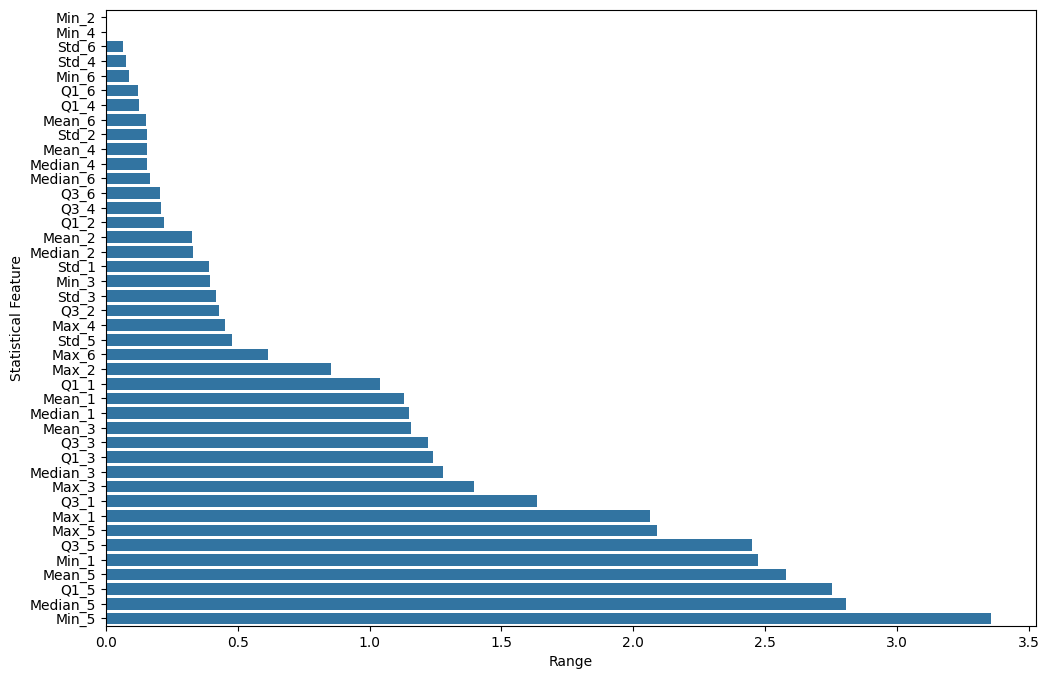

In [80]:
results_df['Range'] = results_df['Upper Bound'] - results_df['Lower Bound']         # Getting the range
sorted_results_df = results_df.sort_values(by='Range')                              # Sorting by Range
plt.figure(figsize=(12, 8))                                                         # Making a Bar Chart
sns.barplot(data=sorted_results_df, x='Range', y='Statistical Feature')
plt.xlabel('Range')
plt.ylabel('Statistical Feature')
plt.show()


I think Std, Q1, and Mean are the Top 3 features for this dataset. This is because the Standard Deviation, value for 25th Percentile, and the Mean have the lowest range.

## 2. ISLR 3.7.4

### (a) Linear Train

The Training RSS of cubic regression might be less than Training RSS of linear regression. X & Y are linear. Due to this the linear model will perform better and result in more Training RSS values. The Cubic model will try to overfit.

### (b) Linear Test

The Test RSS of cubic can be more than Test RSS of linear regression model. Since X & Y are linear, the test RSS will be smaller. Cubic will not perform as good as linear and return higher values.

### (c) Not Linear Train

Cubic regression can have less training RSS than linear regression. This is because Cubic will be better suited for non-linear data. Linear regression model will return more training RSS.

### (d) Not Linear Testing

It cannot be predicted how the Test RSS might be for either regression models since we do not know the true relationship of variables. It depends on the nature of data.